<a href="https://colab.research.google.com/github/whitlo30/202_honors-proj-repo/blob/main/VAE_notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Generating Music using Variational Autoencoders
#### Honors Project | Devin Whitlock <br> Dec 14th, 2022
---
### Introduction


> `Motivation`: Being introduced to the concept of AI-generated artwork, I was always curious whether a machine learning algorithm could create a reasonable interpretation of music. As this question is extremely broad, many different solutions have been proposed, such as generative adversarial networks (GANs) and long short term memory (LSTM) models. Though these approaches can create extremely interesting content in their own right—especially the "abstract" works of GANs—their outputs were never creative enough to warrant any significant interest. Hence, I sought to find a more engaging alternative.




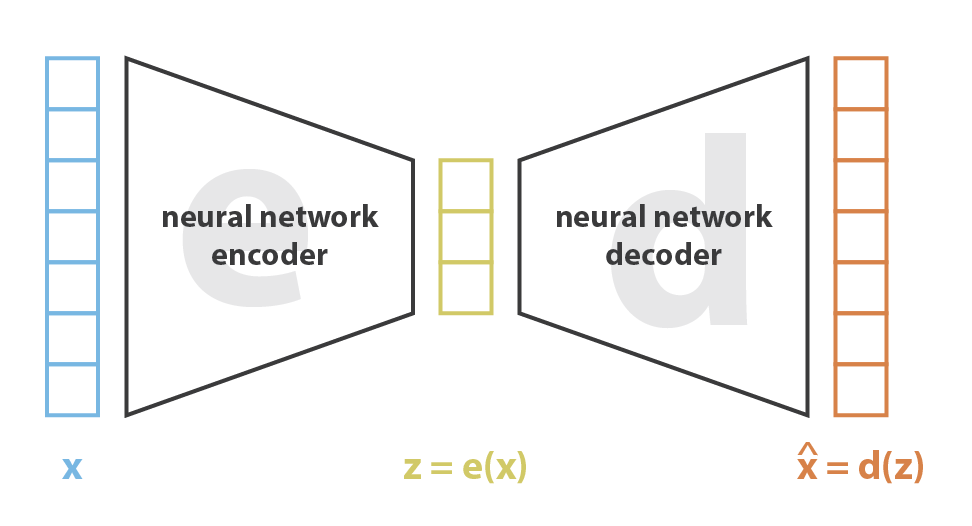

> `The Model`: Through some exploration of different machine learning generation algorithms, I found a promising candidate to my search in variational autoencoders. In order to explain the model, I'll break it into pieces. 
- `Encoder`: An encoder is an algorithm designed to compress data into a smaller format in order to optimize its storage and/or usage. As the data that has been encoded often needs to be understood/reused, a decoder must also be applied in order to retrieve the original representation of that data. Both the encoder and decoder algorithms can be performed using _many_ different methods and the goal of most data compression problems is to find the optimal encoder/decoder combination that allows for the most effective data compression with the least amount of lost information during decompression
  - `Autoencoder`: Instead of manually testing each combination of encoder and decoder, an autoencoder attaches neural networks to both the encoder and decoder and trains them until they have deduced the optimal encoder/decoder combination.
- `Latent Space`: This in-between space where the encoded data exists. Depending on the way in which the autoencoder fitted the encoding parameters, the latent space could either be an incomprehensible jumble of data that is only capable of accurately encoding the training data, or potentially a wide range of values that represents a gradient of possible decoded results. Thinking of it physically, if an autoencoder were to be trained to compress and decompress pieces of music, it could be possible that the latent space (transitional area where the encoded representations lie) is so organized, or "regular," that any random point within it could be chosen such that its decoded representation could actually be a novel musical piece.
   - `Regular`: When the latent space is organized enough for a random chosen point to still produce a comprehensible decoded output
   - `Variational`: A type of autoencoder that forces the latent space to be regular. It does this by encoding the training set as a distribution in the latent space, instead of a point (refer to next image for a visualization). This can be thought of as widening the "capture nets" within the latent space so that if anything were to fall (choosing a point), it would still fall into at least one of the generated nets (encoded representations of the training data).


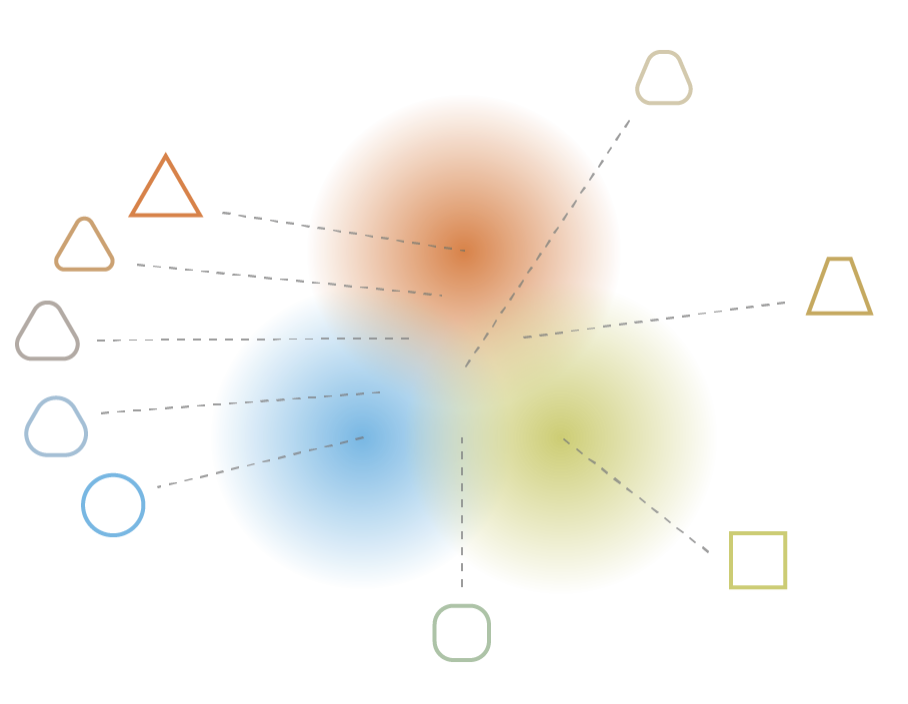

The image above expresses a regular latent space where the autoencoder was trained on representations of a triangle, square, and circle. As these shapes were encoded as a distribution of points within the encoded space, they all have overlap—almost like a venn diagram—which means that any point in between or around these distriibutions of points can have a decoded representation that inherits propoerties from its surrounding points; for example, a point chosen halfway between the triangle and circle distributions would produce a shape that looks like a triangle but has rounded edges.

In [ ]:
!apt-get update -qq && apt-get install -qq libfluidsynth1 fluid-soundfont-gm build-essential libasound2-dev libjack-dev
!pip install -q pyfluidsynth
!pip install -qU magenta

In [ ]:
import ctypes.util
orig_ctypes_util_find_library = ctypes.util.find_library
def proxy_find_library(lib):
  if lib == 'fluidsynth':
    return 'libfluidsynth.so.1'
  else:
    return orig_ctypes_util_find_library(lib)
ctypes.util.find_library = proxy_find_library

import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3' 

import magenta.music as mm
from magenta.models.music_vae import configs
from magenta.models.music_vae.trained_model import TrainedModel
import numpy as np

/usr/local/lib/python3.8/dist-packages/librosa/util/decorators.py:9: NumbaDeprecationWarning: An import was requested from a module that has moved location.
Import requested from: 'numba.decorators', please update to use 'numba.core.decorators' or pin to Numba version 0.48.0. This alias will not be present in Numba version 0.50.0.
  from numba.decorators import jit as optional_jit
/usr/local/lib/python3.8/dist-packages/librosa/util/decorators.py:9: NumbaDeprecationWarning: An import was requested from a module that has moved location.
Import of 'jit' requested from: 'numba.decorators', please update to use 'numba.core.decorators' or pin to Numba version 0.48.0. This alias will not be present in Numba version 0.50.0.
  from numba.decorators import jit as optional_jit
/usr/local/lib/python3.8/dist-packages/resampy/interpn.py:114: NumbaWarning: The TBB threading layer requires TBB version 2019.5 or later i.e., TBB_INTERFACE_VERSION >= 11005. Found TBB_INTERFACE_VERSION = 9107. The TBB thr

In [ ]:
BASE_DIR = "gs://download.magenta.tensorflow.org/models/music_vae/colab2"

def play(note_sequence):
  mm.play_sequence(note_sequence, synth=mm.fluidsynth)

  

In [ ]:
mel_2bar_config = configs.CONFIG_MAP['cat-mel_2bar_big']
mel_2bar = TrainedModel(mel_2bar_config, batch_size=4, checkpoint_dir_or_path=BASE_DIR + '/checkpoints/mel_2bar_big.ckpt')

mel_2_samples = mel_2bar.sample(n=4, length=256, temperature=1)

Instructions for updating:
Use `tf.cast` instead.
/usr/local/lib/python3.8/dist-packages/magenta/models/music_vae/lstm_utils.py:94: UserWarning: `tf.layers.dense` is deprecated and will be removed in a future version. Please use `tf.keras.layers.Dense` instead.
  tf.layers.dense(
/usr/local/lib/python3.8/dist-packages/magenta/contrib/rnn.py:749: UserWarning: `layer.add_variable` is deprecated and will be removed in a future version. Please use the `layer.add_weight()` method instead.
  self._kernel = self.add_variable(
/usr/local/lib/python3.8/dist-packages/magenta/contrib/rnn.py:751: UserWarning: `layer.add_variable` is deprecated and will be removed in a future version. Please use the `layer.add_weight()` method instead.
  self._bias = self.add_variable(
Instructions for updating:
Please use `keras.layers.Bidirectional(keras.layers.RNN(cell))`, which is equivalent to this API
Instructions for updating:
Please use `keras.layers.RNN(cell)`, which is equivalent to this API
/usr/local/li

In [ ]:
for ns in mel_2_samples:
  play(ns)

In [ ]:
drums_nade_full_config = configs.CONFIG_MAP['nade-drums_2bar_full']
drums_full = TrainedModel(drums_nade_full_config, batch_size=4, checkpoint_dir_or_path=BASE_DIR + '/checkpoints/drums_2bar_nade.full.ckpt')

drum_test = drums_full.sample(n = 4, length = 256, temperature = 1.0)

Instructions for updating:
Use the `axis` argument instead


In [ ]:
for ns in drum_test:
  play(ns)

In [ ]:
# !mkdir midi
# !mv ../*.mid ./midi

In [ ]:
!convert_dir_to_note_sequences --input_directory=./midi --output_file=UPDATED_SEQUENCE --recursive

In [ ]:
!music_vae_train --config=hierdec-trio_16bar --run_dir=./music_vae --mode=train --examples_path=./UPDATED_SEQUENCE

In [ ]:
test_config = configs.CONFIG_MAP['hierdec-trio_16bar']
trained_mod = TrainedModel(test_config, batch_size=4, checkpoint_dir_or_path="/content/music_vae/train/")

In [ ]:
tests = trained_mod.sample(n = 4, length = 256, temperature = 1.0)

In [ ]:
for ns in tests:
  play(ns)